In [1]:
from scipy import stats


In [2]:
x = 70

In [3]:
stats.norm.cdf(x, loc=60, scale= 10)

0.8413447460685429

In [4]:
p1=stats.norm.cdf(680, loc=711, scale= 29)

In [5]:
p2=stats.norm.cdf(740, loc=711, scale= 29)

In [8]:
p=p2-p1

In [7]:
import pandas as pd 
import numpy as np


In [19]:
beml_df= pd.read_csv("C:/Users/Akshay Sonawane/Documents/DATA/BEML.csv")
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [20]:
glaxo_df= pd.read_csv("C:/Users/Akshay Sonawane/Documents/DATA/GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [21]:
#get the closing price of the stock along the day
beml_cl = beml_df[['Date', 'Close']]
glaxo_cl = glaxo_df[['Date', 'Close']]


In [22]:
beml_cl

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [23]:
glaxo_cl

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [ ]:
''''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
# Set the date as index for the dataframe to calculate gains

glaxo_df = glaxo_cl.set_index(pd.DatetimeIndex(glaxo_cl['Date']))
beml_df = beml_cl.set_index(pd.DatetimeIndex(beml_cl['Date']))



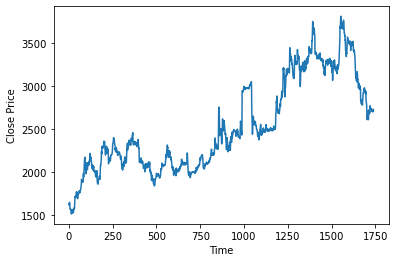

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

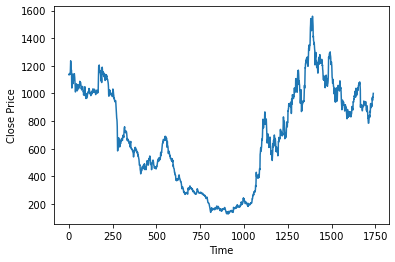

In [25]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [27]:
#create the gain column using pct_change
#gain = closing price(t)-closing price(t-1)/closing price(t-1)
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)


In [28]:
glaxo_df['gain']

0            NaN
1      -0.005444
2       0.013422
3       0.006225
4      -0.005398
          ...   
1734   -0.001283
1735   -0.007986
1736    0.000148
1737    0.009529
1738    0.000697
Name: gain, Length: 1739, dtype: float64

In [29]:
beml_df['gain']

0            NaN
1      -0.000881
2       0.004407
3       0.003993
4      -0.000087
          ...   
1734   -0.021924
1735    0.026782
1736   -0.001332
1737    0.011956
1738    0.014756
Name: gain, Length: 1739, dtype: float64

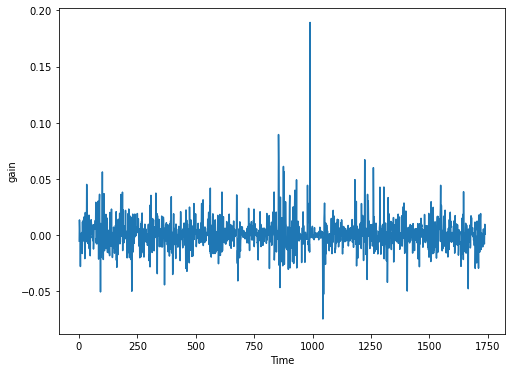

In [33]:
#Plot the gains for glaxo
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');


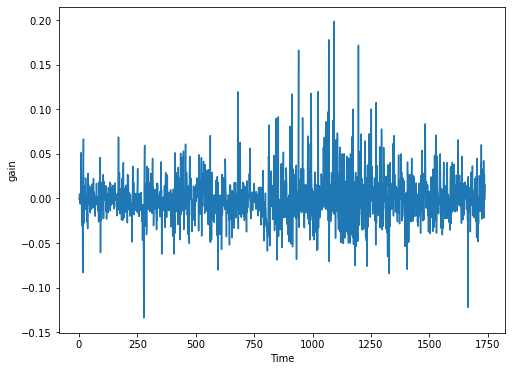

In [34]:
#Plot the gains for beml
plt.figure(figsize = (8, 6));
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');


C:\Users\Akshay Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


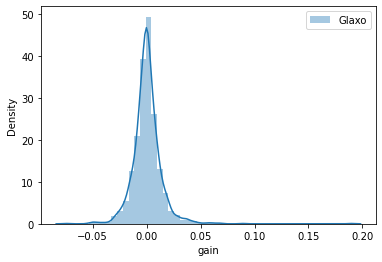

In [36]:
import matplotlib.pyplot as plt
import seaborn as sn 
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();


C:\Users\Akshay Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


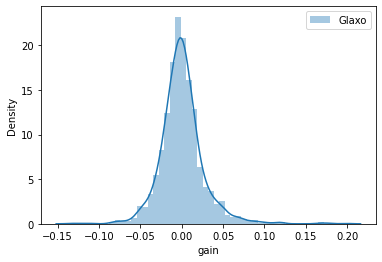

In [37]:
sn.distplot(beml_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [38]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))


Mean: 0.0004
Standard Deviation:  0.0134


In [39]:
print('Mean:', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))


Mean: 0.0003
Standard Deviation:  0.0264


In [40]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [41]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())


0.07104511457618568

In [42]:
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [43]:
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343

In [44]:
#5% loss or gain for beml
stats.norm.cdf( -0.05,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.0285872921433251

In [46]:
1 - stats.norm.cdf(0.05,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.02995288672128471

In [47]:
#5% loss or gain for glaxo
stats.norm.cdf( -0.05,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

8.121323777576258e-05

In [48]:
1 - stats.norm.cdf(0.05,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.00010221835999069118